In [486]:
import pandas as pd
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline



In [487]:
## Задание 1
from sklearn.base import BaseEstimator, ClusterMixin
from collections import Counter
from scipy.spatial import distance_matrix


class DBSCAN(BaseEstimator, ClusterMixin):
    """
    Implement clustering algorithm according 
    """   
    
    def __init__(self, **kwargs):
        """
        Please add necessary algoritm parameters to class constructor.
        """
        self.eps     = kwargs['eps']     if 'eps'     in kwargs else 0.8
        self.min_pts = kwargs['min_pts'] if 'min_pts' in kwargs else 5
        self.label = None
        return
        
        
    def fit(self, x, y=None):
        """
        Use data matrix x to compute model parameters
        """
        DIST = distance_matrix(x,x) #
        self.DIST = DIST
        
        self.x_len = len(x)
        C = 0
        y = np.zeros(self.x_len )-1
        for ind in range(self.x_len):
            if y[ind] != -1:
                continue                                                   #Previously processed in inner loop
            Neighbors = np.where(DIST[ind,:]<self.eps)[0]                  #Find neighbors
            if len(Neighbors) < self.min_pts:                              #Density check
                y[ind] = 0                                                 #Label as Noise
                continue
            C = C+1                                                        #next cluster label
            y[ind] = C
            
            S = list(np.delete(Neighbors, np.argwhere(Neighbors == ind)))  #Neighbors to expand
            c = -1
            while(c<len(S)-1):                                             #Process every seed point
                c += 1                                                        
                ind2 = S[c]
                if y[ind2] == 0  : y[ind2] != C                            #Change Noise to border point
                if y[ind2] != -1 : continue
                    
                y[ind2] = C                                                #Label neighbor 
                Neighbors = np.where(DIST[ind2,:]<self.eps)[0]             #Find neighbors
                if len(Neighbors) >= self.min_pts:                         #Density check
                    S.extend(list(set(Neighbors) - set(S)))                #Add new neighbors to seed set
        self.label = y
        return self
    
    
    def predict(self, x, show_outliers = True):
        """
        Using computed model parameters predict cluster
        for all objects from x
        """
        if show_outliers:
            return self.label-1
        else:
            label = self.label
            for ind in np.where(self.label == 0)[0]:
                srt = self.DIST[ind, :]
                q = ind
                while(label[q] == 0):
                    q = np.argmin(srt)
                    srt[q] = 1e4
                label[ind] = label[q]
            return label-1
    
    def fit_predict(self, x, y=None, show_outliers = True):
        self.fit(x, y)
        return self.predict(x, show_outliers = show_outliers)


In [488]:
df = pd.read_csv('WDI_csv/WDIDATA.csv')

In [489]:
df = df.fillna(1488666)

In [490]:
YEAR = '2016'
t = df[df[YEAR] != 1488666]

In [491]:
t

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
61,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,8.820581e+01,8.964473e+01,9.094450e+01,9.206363e+01,9.289288e+01,9.336446e+01,...,6.423529e+01,6.336503e+01,6.269472e+01,6.234170e+01,6.216885e+01,6.211819e+01,6.208986e+01,6.201723e+01,6.205748e+01,1488666.0
62,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,6.602746e+00,6.714313e+00,6.809043e+00,6.884778e+00,6.937449e+00,6.965510e+00,...,6.723372e+00,6.691941e+00,6.680537e+00,6.701228e+00,6.731905e+00,6.776477e+00,6.840704e+00,6.928260e+00,7.050994e+00,1488666.0
63,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,8.146539e+01,8.277583e+01,8.394566e+01,8.492841e+01,8.563795e+01,8.603748e+01,...,5.564977e+01,5.475581e+01,5.407442e+01,5.370268e+01,5.351930e+01,5.345755e+01,5.340349e+01,5.328138e+01,5.324358e+01,1488666.0
75,Arab World,ARB,Agriculture value added per worker (constant 2...,EA.PRD.AGRI.KD,1.488666e+06,1.488666e+06,1.488666e+06,1.488666e+06,1.488666e+06,1.488666e+06,...,3.737763e+03,3.947431e+03,4.075102e+03,4.307859e+03,4.451748e+03,4.707504e+03,4.738155e+03,4.789458e+03,4.910700e+03,1488666.0
77,Arab World,ARB,"Agriculture, value added (annual % growth)",NV.AGR.TOTL.KD.ZG,1.488666e+06,1.488666e+06,1.488666e+06,1.488666e+06,1.488666e+06,1.488666e+06,...,1.726397e+00,6.189601e+00,3.660895e+00,6.073523e+00,3.580483e+00,5.892287e+00,6.977536e-01,2.655979e-01,2.841115e+00,1488666.0
78,Arab World,ARB,"Agriculture, value added (constant 2010 US$)",NV.AGR.TOTL.KD,1.488666e+06,1.488666e+06,1.488666e+06,1.488666e+06,1.488666e+06,2.994327e+10,...,1.058152e+11,1.123647e+11,1.164783e+11,1.235526e+11,1.279764e+11,1.355171e+11,1.364627e+11,1.368251e+11,1.407125e+11,1488666.0
81,Arab World,ARB,"Agriculture, value added (current US$)",NV.AGR.TOTL.CD,1.488666e+06,1.488666e+06,1.488666e+06,1.488666e+06,1.488666e+06,3.770033e+09,...,9.622567e+10,1.049272e+11,1.164783e+11,1.296782e+11,1.389020e+11,1.518207e+11,1.583257e+11,1.601420e+11,1.667429e+11,1488666.0
82,Arab World,ARB,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,1.488666e+06,1.488666e+06,1.488666e+06,1.488666e+06,1.488666e+06,1.488666e+06,...,1.317642e+04,1.455754e+04,1.579209e+04,1.713693e+04,1.971176e+04,2.223401e+04,2.469890e+04,2.652753e+04,2.838473e+04,1488666.0
83,Arab World,ARB,"Air transport, passengers carried",IS.AIR.PSGR,1.488666e+06,1.488666e+06,1.488666e+06,1.488666e+06,1.488666e+06,1.488666e+06,...,5.354202e+07,9.537205e+07,1.267965e+08,1.358376e+08,1.520142e+08,1.662093e+08,1.816273e+08,1.949707e+08,2.136465e+08,1488666.0
84,Arab World,ARB,"Air transport, registered carrier departures w...",IS.AIR.DPRT,1.488666e+06,1.488666e+06,1.488666e+06,1.488666e+06,1.488666e+06,1.488666e+06,...,5.042110e+05,8.112210e+05,1.065038e+06,1.093319e+06,1.159026e+06,1.222184e+06,1.289639e+06,1.329918e+06,1.428203e+06,1488666.0


In [492]:
df_f = {}
ttt = 0
for key, lst in t.groupby("Country Code"):
    df_f[key] = {}
    for ind, value in zip(lst['Indicator Name'], lst[YEAR]):
        df_f[key][ind] = value

In [493]:
g = pd.DataFrame.from_dict(df_f).T

In [494]:
g = g.fillna(1488666)

In [495]:
#How many NaN?
line = {}
for i in g.keys():
#     print(g[i])
    line[i] = len(g[i])-list(g[i]).count(1488666)

In [496]:
# for i in sorted(line.items(), key = lambda x:-x[1]):
#     print(i[0]+'\t'+str(i[1]))

(array([ 293.,   10.,   60.,   51.,   64.,   91.,   62.,   26.,   85.,   97.]),
 array([   1. ,   27.2,   53.4,   79.6,  105.8,  132. ,  158.2,  184.4,
         210.6,  236.8,  263. ]),
 <a list of 10 Patch objects>)

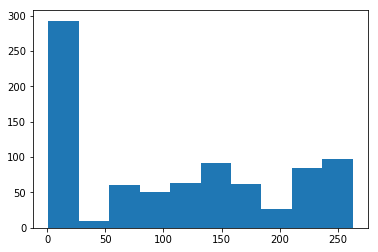

In [497]:
plt.hist(line.values())

### Так как обучать метрические алгоритмы кластеризации на большом количестве фичей нельзя (рпоклятие размерности), возьмем только часть признаков GDP

План 
- Удалим страны(объединения), которых нет на карте
- Уберем все редкие фичи
- Оставим 5-10 полезных фичей

In [499]:
g_all = g.copy()

In [647]:
# features = [i[0] for i in filter(lambda x:x[1]>150 and x[1]<160,line.items())]
# import random 
features = sorted([i[0] for i in filter(lambda x:"GDP" in x[0], line.items())], key = lambda x:-line[x])[0:5]

In [648]:
df = pd.read_csv("Country_List_ISO_3166_Codes_Latitude_Longitude.csv")
a = set(t['Country Code'].unique())
b = set(df['Alpha-3 code'].unique())
countr_dct = {k:i for i,k in t[["Country Name","Country Code"]].get_values()}
# for i in a-b:
#     countr_dct(temp[i])
countries = df[df['Alpha-3 code'].isin(a & b)][['Alpha-3 code', "Latitude (average)", "Longitude (average)"]]

In [649]:
g = g_all[features]
g = g[g.index.isin(countr_dct.keys())]#'ABW'
g = g.replace(1488666, np.nan)

In [650]:
for i in features:
    g[i] = (g[i]-g[i].mean())/g[i].std()

In [651]:
g = g.replace(np.nan, g.mean())

In [666]:
y_predict = DBSCAN(eps = 0.5, min_samples = 1).fit_predict(g.get_values(), show_outliers = False)
# y_predict = KMeans(n_clusters=2).fit_predict(g.get_values())
Counter(y_predict)

Counter({0.0: 233, 1.0: 30})

In [667]:
df = pd.read_csv("Country_List_ISO_3166_Codes_Latitude_Longitude.csv")
a = set(t['Country Code'].unique())
b = set(df['Alpha-3 code'].unique())
countr_dct = {k:i for i,k in t[["Country Name","Country Code"]].get_values()}
# for i in a-b:
#     countr_dct(temp[i])
countries = df[df['Alpha-3 code'].isin(a & b)][['Alpha-3 code', "Latitude (average)", "Longitude (average)"]]

In [668]:
draw_lst = {}
draw_crunch = {}
for c, i in enumerate(g.index):
        if i in countries['Alpha-3 code'].get_values():
#             print(countries[countries['Alpha-3 code'] == i].get_values()[0])
            cname, lat, long = countries[countries['Alpha-3 code'] == i].get_values()[0]
            draw_lst[cname] = [lat, long, y_predict[c]]
            if y_predict[c] not in draw_crunch:
                draw_crunch[y_predict[c]] = [[lat, long]]
            else:
                draw_crunch[y_predict[c]].append([lat, long])
            

In [669]:
from collections import Counter
print(Counter(y_predict))
def get_color(i):
    if i==0:
        return "blue"
    if i==1:
        return "green"
    if i==2:
        return "yellow"
    if i==3:
        return "pink"
    if i==4:
        return "cyan"
#     if i==5:
#         return ""

    return "red"

Counter({0.0: 233, 1.0: 30})


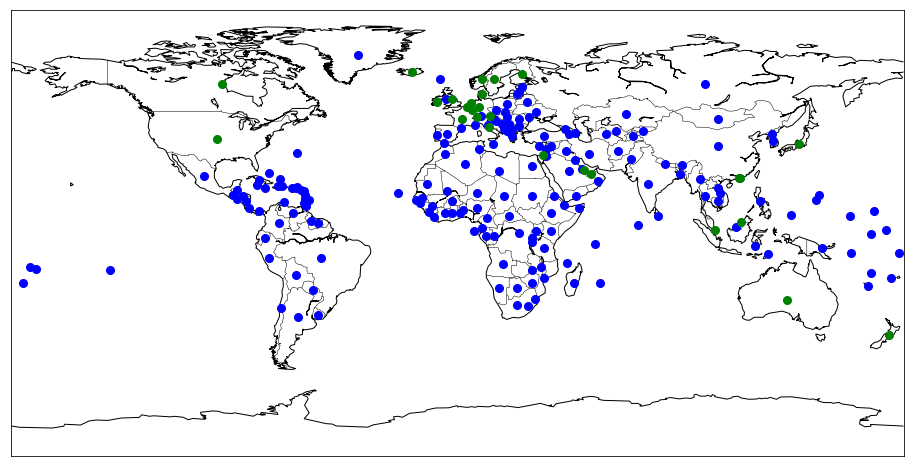

In [670]:
from mpl_toolkits.basemap import Basemap
# from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap

import matplotlib.pyplot as plt
plt.figure(figsize = (16,12))
map = Basemap()

map.drawcoastlines()
map.drawcountries()
lst = draw_lst.values()
for clr, lst in draw_crunch.items():
#     if clr in [0,2]: continue
    map.plot([i[1] for i in lst], [i[0] for i in lst],'bo', c = get_color(clr), markersize=8)

plt.show()
plt.savefig('test.png')

In [671]:
for i in features:
    print(i)

GDP per person employed (constant 2011 PPP $)
GDP (current US$)
GDP per capita (current US$)
Inflation, GDP deflator (annual %)
GDP (constant 2010 US$)
